In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from datetime import datetime

### 데이터 로드

In [2]:
df19 = pd.read_csv('../data/daejeon/2019.csv')
df20 = pd.read_csv('../data/daejeon/2020.csv',encoding='cp949')
df21 = pd.read_csv('../data/daejeon/2021.csv')
df22 = pd.read_csv('../data/daejeon/2022(5월말까지).csv')

df19.columns = ['rent_id','rent_time','return_id','return_time','travel_distance','fare']
df20.columns = ['rent_id','rent_time','return_id','return_time','travel_distance','fare']
df21.columns = ['rent_id','rent_time','return_id','return_time','travel_distance','fare']
df22.columns = ['rent_id','rent_time','return_id','return_time','travel_distance','fare']
# fare : 00 : 정회원 / 01 : 일반회원 / 02 : 비회원

In [3]:
df19['rent_time'] = pd.to_datetime(df19['rent_time'],format='%Y%m%d%H%M%S')
df19['return_time'] = pd.to_datetime(df19['return_time'],format='%Y%m%d%H%M%S')
df20['rent_time'] = pd.to_datetime(df20['rent_time'],format='%Y%m%d%H%M%S')
df20['return_time'] = pd.to_datetime(df20['return_time'],format='%Y%m%d%H%M%S')
df21['rent_time'] = pd.to_datetime(df21['rent_time'],format='%Y%m%d%H%M%S')
df21['return_time'] = pd.to_datetime(df21['return_time'],format='%Y%m%d%H%M%S')
df22['rent_time'] = pd.to_datetime(df22['rent_time'],format='%Y%m%d%H%M%S')
df22['return_time'] = pd.to_datetime(df22['return_time'],format='%Y%m%d%H%M%S')

In [4]:
#null값 제거하기
df19.dropna(subset = ['return_id'],inplace=True)
df20.dropna(subset = ['return_id'],inplace=True)
df21.dropna(subset = ['rent_id','return_id'],inplace=True)
df22.dropna(subset = ['return_id'],inplace=True)

In [5]:
# 형태 맞추기
df21['rent_id'] = df21['rent_id'].astype('int')
df19['return_id'] = df19['return_id'].astype('int')
df20['return_id'] = df20['return_id'].astype('int')
df21['return_id'] = df21['return_id'].astype('int')

In [8]:
df19.head()

,rent_id,rent_time,return_id,return_time,travel_distance,fare
0,185,2019-01-01 00:00:02,185,2019-01-01 01:16:08,0.0,2
1,29,2019-01-01 00:01:11,29,2019-01-01 00:15:05,530.0,2
2,60,2019-01-01 00:02:12,66,2019-01-01 00:10:46,540.0,2
3,208,2019-01-01 05:03:36,244,2019-01-01 05:53:30,3130.0,2
4,208,2019-01-01 05:04:21,244,2019-01-01 05:53:13,3140.0,0


In [6]:
def remove_sta(df):
    df = df[(df['rent_id'] != 0) & (df['return_id'] != 0)] # 0번은 인식되지 않은 대여소를 의미
    df = df[~((df['rent_id'] == df['return_id']) & ((df21['return_time'] - df21['rent_time']).dt.seconds<120))]
    df.reset_index(drop=True,inplace=True)# 19,20년도는 정제안되어있더라..!
    return df

In [7]:
df19 = remove_sta(df19)
df20 = remove_sta(df20)
df21 = remove_sta(df21)
df22 = remove_sta(df22)

<ipython-input-6-40482b520bec>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[~((df['rent_id'] == df['return_id']) & ((df21['return_time'] - df21['rent_time']).dt.seconds<120))]


대여소 정보 추가

In [12]:
sta_info = pd.read_csv('../data/daejeon/타슈 대여소정보_220601v2.csv')

In [13]:
sta_info.head()

,ID,stationName,Y,X,start_date,end_date,Xn,Yn,Elev
0,1,무역전시관입구(택시승강장),36.374380,127.387331,2019-07-08,2022-05-31,989893.621616,1.819665e+06,44.490215
1,2,대전컨벤션센터,36.374389,127.392375,2019-01-01,2022-06-01,990346.068308,1.819665e+06,41.869499
2,3,한밭수목원1,36.368995,127.388451,2019-01-01,2022-06-01,989993.395718,1.819067e+06,40.563755
3,4,초원아파트(104동 버스정류장),36.367945,127.379302,2019-01-01,2022-05-31,989172.530535,1.818952e+06,45.611195
4,5,둔산대공원 입구(버스정류장),36.364974,127.388856,2019-01-01,2022-05-31,990029.213603,1.818621e+06,40.136238


---
### 전처리

In [14]:
#월 column 추가
df20['month'] = df20['rent_time'].dt.month
df19['month'] = df19['rent_time'].dt.month

#요일 column 추가 (월, 1 : 화, 2 : 수, 3 : 목, 4 : 금, 5 : 토, 6 : 일)
df20['weekday'] = df20['rent_time'].dt.weekday
df19['weekday'] = df19['rent_time'].dt.weekday

#시간 column 추가
df20['hour'] = df20['rent_time'].dt.hour
df19['hour'] = df19['rent_time'].dt.hour

#일
df20['day'] = df20['rent_time'].dt.day
df19['day'] = df19['rent_time'].dt.day

In [15]:
df19['return_id'] = df19['return_id'].astype('int')
df20['return_id'] = df20['return_id'].astype('int')

In [16]:
df19['travel_time'] = (df19['return_time'] - df19['rent_time']).apply(lambda x : x.seconds)
df20['travel_time'] = (df20['return_time'] - df20['rent_time']).apply(lambda x : x.seconds)

#### 기준에 맞추어 데이터 제거
타슈 특징 : 12 ~ 2월은 대여 05~24시만 가능, 반납은 모든시간대 가능  
몇시간 이상이면 도난/분실로 간주하는지는 정확한 시간이 명시되어있지 않음 (6시간으로 설정하겠음)  

In [17]:
df19 = df19[(df19['travel_time']>=60) & (df19['travel_time']<=21600)]
df20 = df20[(df20['travel_time']>=60) & (df20['travel_time']<=21600)]

#### 공휴일&주말 / 주중으로 데이터 분리

In [18]:
def hol_wek_19(df19):
    # 2019년 공휴일 따로 빼줌..
    df19_hol = df19[((df19['month']==1) & (df19['day']==1)) | ((df19['month']==2) & (df19['day']==4))
                | ((df19['month']==2) & (df19['day']==5)) | ((df19['month']==2) & (df19['day']==6))
                | ((df19['month']==3) & (df19['day']==1)) | ((df19['month']==6) & (df19['day']==6))
                | ((df19['month']==8) & (df19['day']==15)) | ((df19['month']==9) & (df19['day']==12))
                | ((df19['month']==9) & (df19['day']==13)) | ((df19['month']==10) & (df19['day']==3))
                | ((df19['month']==10) & (df19['day']==9)) | ((df19['month']==12) & (df19['day']==25)) | (df19['weekday']>=5)]
    
    df19_wek = df19.drop(df19_hol.index)
    
    return df19_hol, df19_wek

def hol_wek_20(df20):
    # 2020년 공휴일 따로 빼줌..
    df20_hol = df20[((df20['month']==1) & (df20['day']==1)) | ((df20['month']==1) & (df20['day']==24)) 
     | ((df20['month']==1) & (df20['day']==27)) | ((df20['month']==4) & (df20['day']==30)) 
     | ((df20['month']==5) & (df20['day']==5)) | ((df20['month']==8) & (df20['day']==17)) 
     | ((df20['month']==9) & (df20['day']==30)) | ((df20['month']==10) & (df20['day']==1)) 
     | ((df20['month']==10) & (df20['day']==2)) | ((df20['month']==10) & (df20['day']==9)) 
     | ((df20['month']==12) & (df20['day']==25)) | (df20['weekday']>=5)]
    
    df20_wek = df20.drop(df20_hol.index)
    
    return df20_hol, df20_wek

In [19]:
df19_hol, df19_wek = hol_wek_19(df19)
df20_hol, df20_wek = hol_wek_20(df20)

In [ ]:
# df19_hol.to_csv('../data/daejeon/df19_hol.csv',index=None)
# df19_wek.to_csv('../data/daejeon/df19_wek.csv',index=None)

# df20_hol.to_csv('../data/daejeon/df20_hol.csv',index=None)
# df20_wek.to_csv('../data/daejeon/df20_wek.csv',index=None)

이용량

([<matplotlib.axis.XTick at 0x1f7b88a0100>,
 [Text(0, 0, '19'), Text(1, 0, '20')])

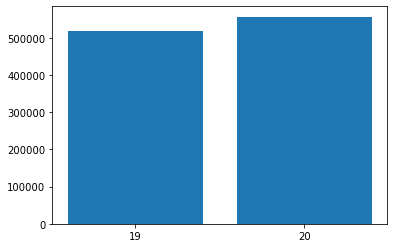

In [20]:
usage19 = len(df19_hol) + len(df19_wek)
usage20 = len(df20_hol) + len(df20_wek)
plt.bar(np.arange(2),[usage19,usage20])
plt.xticks(np.arange(2),['19','20'])

## 히트맵 그려보기
#### 19 20년 비교

In [21]:
#비율 계산 함수
def Fare_valueRatio(df,a):
    return pd.DataFrame(df[a].value_counts()).sort_index()/len(df)

In [22]:
month7 = []
for i in range(1,13):
    for j in range(7):
        month7.append(i)
weekday12 = [x for x in range(1,8)]*12

In [23]:
df19_gb = df19.groupby(['month','weekday']).size()

In [24]:
df19_gbdf = pd.DataFrame({'month': month7,
                             'weekday': weekday12,
                             'count':list(df19_gb)})
df19_pivot = df19_gbdf.pivot('weekday', 'month', 'count')
df19_pivot.index = ['Mon','Tue','Wed','Thur','Fri','Sat','Sun']
df19_pivot

month,1,2,3,4,5,6,7,8,9,10,11,12
Mon,1874,2190,3627,7046,6776,8951,10412,7591,8941,6169,4931,3676
Tue,2182,1655,3992,6604,8811,8993,10850,7331,8121,10510,5552,3317
Wed,2358,2215,3202,5923,11064,7960,9032,7138,7503,8664,4526,2963
Thur,2358,2673,3787,5377,10735,7540,5618,8095,6577,10643,4793,2589
Fri,2101,2042,5061,5535,11653,7665,7665,10310,6636,9335,7172,2741
Sat,1614,2186,4566,9698,8611,9035,5208,9020,5245,9295,7473,2663
Sun,1681,1996,4990,7228,7940,10050,6210,6635,8601,9326,4258,2409


In [25]:
df20_gb = df20.groupby(['month','weekday']).size()

In [26]:
df20_gbdf = pd.DataFrame({'month': month7,
                             'weekday': weekday12,
                             'count':list(df20_gb)})
df20_pivot = df20_gbdf.pivot('weekday', 'month', 'count')
df20_pivot.index = ['Mon','Tue','Wed','Thur','Fri','Sat','Sun']
df20_pivot

month,1,2,3,4,5,6,7,8,9,10,11,12
Mon,1498,2787,7971,8230,8712,10192,4038,6594,7843,7912,6035,2525
Tue,2263,2390,7935,9107,6969,9241,5840,4669,12119,8457,4457,2986
Wed,2803,2312,6892,12224,10790,6300,7134,4223,8242,8425,4500,2895
Thur,3756,3172,4298,13026,10496,7236,7401,5482,8657,10567,4803,2962
Fri,3489,2652,5272,8821,9158,8044,7069,4083,8951,11731,4689,2614
Sat,1866,3426,7604,10676,12032,6731,8214,4189,10697,11905,5777,2550
Sun,2412,2078,10509,7923,12640,8776,6524,6765,11298,9479,4605,2182


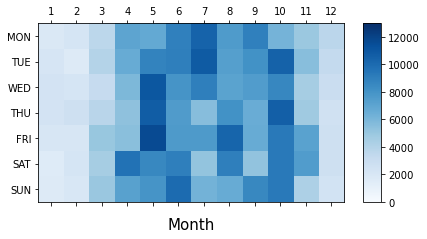

In [27]:
cmap = plt.get_cmap('Blues')

plt.matshow(df19_pivot, cmap=cmap)
plt.colorbar(shrink=0.8, aspect=10)
plt.xticks(np.arange(0,12),np.arange(1,13,1))
plt.yticks(np.arange(0,7),['MON','TUE','WED','THU','FRI','SAT','SUN'])
plt.xlabel('Month', labelpad = 15, fontdict = {'size' : 15})


plt.clim(0,13000)

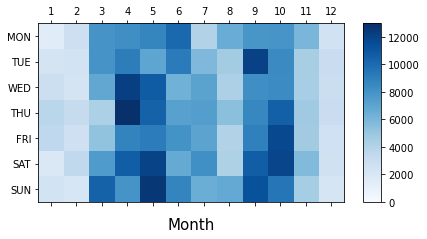

In [28]:
plt.matshow(df20_pivot, cmap=cmap)
plt.colorbar(shrink=0.8, aspect=10)
plt.xticks(np.arange(0,12),np.arange(1,13,1))
plt.yticks(np.arange(0,7),['MON','TUE','WED','THU','FRI','SAT','SUN'])
plt.xlabel('Month', labelpad = 15, fontdict = {'size' : 15})


plt.clim(0,13000)

In [ ]:
# df19_pivot.to_csv('../data/df19_pivot.csv')
# df20_pivot.to_csv('../data/df20_pivot.csv')

------------------------------------

#### 시간별 대여량 비교(비율로 계산)	

In [29]:
hour_index=np.arange(0,24,1)

df19_hour = Fare_valueRatio(df19,'hour')
df20_hour = Fare_valueRatio(df20,'hour')

df19_hol_hour = Fare_valueRatio(df19_hol,'hour')
df20_hol_hour = Fare_valueRatio(df20_hol,'hour')

df19_wek_hour = Fare_valueRatio(df19_wek,'hour')
df20_wek_hour = Fare_valueRatio(df20_wek,'hour')

In [30]:
df_hour = pd.concat([df19_hour,df20_hour,df19_hol_hour,df20_hol_hour,df19_wek_hour,df20_wek_hour],axis=1)
df_hour.columns = ['19_all','20_all','19_hol','20_hol','19_wek','20_wek']

In [31]:
df_hour = pd.concat([pd.DataFrame([[0]*6]*4,index=[1,2,3,4],columns=df_hour.columns),df_hour],axis=0).sort_index()
df_hour

,19_all,20_all,19_hol,20_hol,19_wek,20_wek
0,0.001249,0.001072,0.001374,0.001062,0.001194,0.001078
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.007085,0.007346,0.007434,0.006137,0.006934,0.007969
6,0.010429,0.009183,0.007466,0.006543,0.011714,0.010543
7,0.024559,0.019943,0.011550,0.010937,0.030199,0.024583
8,0.048770,0.040063,0.020358,0.018748,0.061088,0.051047
9,0.031489,0.027480,0.026456,0.025138,0.033671,0.028687


In [ ]:
# df_hour.to_csv('../data/df_hour.csv')

In [32]:
# 축 크기 설정
parameters = {'axes.labelsize': 13,
              'xtick.labelsize' : 13,
              'ytick.labelsize' : 13,
          'legend.fontsize': 12}
plt.rcParams.update(parameters)

In [33]:
hour_xname = [str(x) + 'AM' if x%4 == 0 else '' for x in range(12)] + ['12PM']+ [str(x) + 'PM' if x%4 == 0 else '' for x in range(1,12)]

In [34]:
hour_index=np.arange(0,24,1)

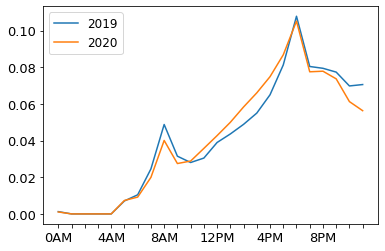

In [35]:
plt.plot(hour_index,df_hour['19_all'], label='2019')
plt.plot(hour_index,df_hour['20_all'], label='2020')
plt.xticks(hour_index,hour_xname)
plt.legend(loc=2)

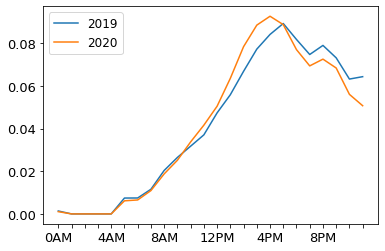

In [36]:
plt.plot(hour_index,df_hour['19_hol'], label='2019')
plt.plot(hour_index,df_hour['20_hol'], label='2020')
plt.xticks(hour_index,hour_xname)
plt.legend(loc=2)

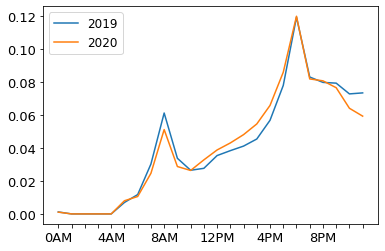

In [37]:
plt.plot(hour_index,df_hour['19_wek'], label='2019')
plt.plot(hour_index,df_hour['20_wek'], label='2020')
plt.xticks(hour_index,hour_xname)
plt.legend(loc=2)

이용시간

In [38]:
def travel_time_scope(x):
    if x<10:
        return 0
    elif x<20:
        return 10
    elif x<30:
        return 20
    elif x<40:
        return 30
    elif x<50:
        return 40
    elif x<60:
        return 50
    elif x<70:
        return 60
    elif x<80:
        return 70
    elif x<90:
        return 80
    elif x<100:
        return 90
    elif x<110:
        return 100
    else:
        return 110

In [39]:
th19_hol = (df19_hol['travel_time']/60).apply(travel_time_scope)
th20_hol = (df20_hol['travel_time']/60).apply(travel_time_scope)

In [40]:
th19_hol = (th19_hol.value_counts()/len(th19_hol)).sort_index()
th20_hol = (th20_hol.value_counts()/len(th20_hol)).sort_index()

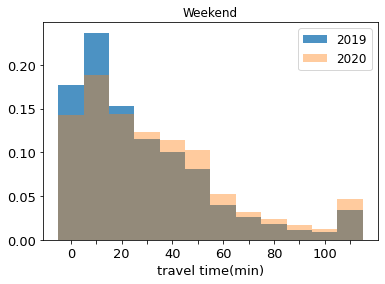

In [41]:
plt.bar(np.arange(12),th19_hol, alpha=0.8,width=1,label='2019')
plt.bar(np.arange(12),th20_hol,alpha=0.4, width=1,label='2020')
plt.xticks(np.arange(12),[0,'',20,'',40,'',60,'',80,'',100,''])
plt.xlabel('travel time(min)')
plt.title('Weekend')
plt.legend()

In [42]:
th19_wek = (df19_wek['travel_time']/60).apply(travel_time_scope)
th20_wek = (df20_wek['travel_time']/60).apply(travel_time_scope)

In [43]:
th19_wek = (th19_wek.value_counts()/len(th19_wek)).sort_index()
th20_wek = (th20_wek.value_counts()/len(th20_wek)).sort_index()

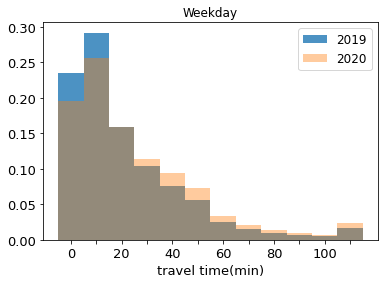

In [44]:
plt.bar(np.arange(12),th19_wek, alpha=0.8,width=1,label='2019')
plt.bar(np.arange(12),th20_wek,alpha=0.4, width=1,label='2020')
plt.xticks(np.arange(12),[0,'',20,'',40,'',60,'',80,'',100,''])
plt.xlabel('travel time(min)')
plt.title('Weekday')
plt.legend()